In [48]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import analysis_utils as au
import CMR_IA as cmr
from matplotlib.lines import Line2D
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVE_FIG = False

In [2]:
with open("simu1_data/simu1_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 100]
df

,subject_ID,position,item,itemno,category_label,lag,old,session,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,58,0,UNDERWEAR,282,Clothing,0,False,0,282,-1,282,-1
1,58,1,JEANS,139,Clothing,0,False,0,139,-1,139,-1
2,58,2,JACKET,138,Clothing,0,False,0,138,-1,138,-1
3,58,3,TABLET,263,Electronics,0,False,0,263,-1,263,-1
4,58,4,COMPUTER,62,Electronics,0,False,0,62,-1,62,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
579995,337,575,LAKE,148,Landscapes,0,False,999,148,-1,148,-1
579996,337,576,PIE,201,Desserts,78,True,999,201,-1,201,-1
579997,337,577,LOBSTER,160,OceanAnimals,90,True,999,160,-1,160,-1
579998,337,578,MAPLE,161,Trees,118,True,999,161,-1,161,-1


### Run CMR-IA

In [3]:
s_mat = np.load('simu1_data/simu1_300_smat.npy')

In [4]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.05,
    beta_rec = 0,
    beta_cue = 0,
    beta_rec_post = 0.01,
    gamma_fc = 0.1,
    s_fc = 0.096,
    c_thresh_itm = 0.544,
    use_new_context = True,
)
params

{'beta_enc': 0.05,
 'beta_rec': 0,
 'beta_cue': 0,
 'beta_rec_post': 0.01,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.096,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.544,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [23]:
df_simu = cmr.run_conti_recog_multi_sess(params,df,s_mat,mode='Continuous')

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [09:56<00:00,  1.68it/s]

CMR Time: 596.8956980705261


In [24]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old
0,0,0,282,-1,282,-1,0.0,0.052727,0.000000,58,UNDERWEAR,282,Clothing,0,False
1,0,1,139,-1,139,-1,0.0,0.071556,0.015268,58,JEANS,139,Clothing,0,False
2,0,2,138,-1,138,-1,0.0,0.098567,0.031280,58,JACKET,138,Clothing,0,False
3,0,3,263,-1,263,-1,0.0,0.111749,0.037556,58,TABLET,263,Electronics,0,False
4,0,4,62,-1,62,-1,0.0,0.160584,0.055684,58,COMPUTER,62,Electronics,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,1571.542480,0.515122,337,LAKE,148,Landscapes,0,False
579996,999,576,201,-1,201,-1,1.0,1194.728638,0.586585,337,PIE,201,Desserts,78,True
579997,999,577,160,-1,160,-1,1.0,848.243896,0.603710,337,LOBSTER,160,OceanAnimals,90,True
579998,999,578,161,-1,161,-1,1.0,1166.205566,0.587793,337,MAPLE,161,Trees,118,True


In [ ]:
df_simu.to_pickle("simu1_data/simu1_result.pkl")

### Preprocesssing

In [31]:
with open("simu1_data/simu1_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [33]:
# calculate the rolling category length
rolling_window = 9
category_label_dummies = df_simu['category_label'].str.get_dummies()
category_label_dummies.columns = ['cl_' + col for col in category_label_dummies.columns]
category_label_dummies_events = pd.concat([df_simu, category_label_dummies], axis=1) # record the occurrence of every cat label
cl_rolling_sum = category_label_dummies_events.groupby('session').rolling(rolling_window, min_periods=1, on='position')[category_label_dummies.columns].sum().reset_index()
df_rollcat = df_simu.merge(cl_rolling_sum, on=['session', 'position'])
df_simu['roll_cat_label_length'] = df_rollcat.apply(lambda x: x['cl_' + x['category_label']], axis = 1) # how many cat within 10 window
df_simu['roll_cat_label_length'] = df_simu['roll_cat_label_length'] - 1 # how many cat in previous 9 window. not include self

# add rolling category length level
# option = "0-1-2+"
option = "0+1-2+"
# option = "0-1+"
if option == "0-1-2+":
    # option 0: 0, 1, >=2
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 1, 2, np.inf], right=False, include_lowest = True,
                                    labels=['0', '1', '>=2']).astype('str')
elif option == "0+1-2+":
    # option 1: 0-1, >=2
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 2, np.inf], right=False, include_lowest = True,
                                    labels=['0-1', '>=2']).astype('str')
elif option == "0-1+":
    # option 2: 0, >=1
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 1, np.inf], right=False, include_lowest = True,
                                    labels=['0', '>=1']).astype('str')
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level
0,0,0,282,-1,282,-1,0.0,0.052727,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1
1,0,1,139,-1,139,-1,0.0,0.071556,0.015268,58,JEANS,139,Clothing,0,False,1.0,0-1
2,0,2,138,-1,138,-1,0.0,0.098567,0.031280,58,JACKET,138,Clothing,0,False,2.0,>=2
3,0,3,263,-1,263,-1,0.0,0.111749,0.037556,58,TABLET,263,Electronics,0,False,0.0,0-1
4,0,4,62,-1,62,-1,0.0,0.160584,0.055684,58,COMPUTER,62,Electronics,0,False,1.0,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,1571.542480,0.515122,337,LAKE,148,Landscapes,0,False,6.0,>=2
579996,999,576,201,-1,201,-1,1.0,1194.728638,0.586585,337,PIE,201,Desserts,78,True,0.0,0-1
579997,999,577,160,-1,160,-1,1.0,848.243896,0.603710,337,LOBSTER,160,OceanAnimals,90,True,0.0,0-1
579998,999,578,161,-1,161,-1,1.0,1166.205566,0.587793,337,MAPLE,161,Trees,118,True,0.0,0-1


In [34]:
# add log and log lag bin
df_simu['log_lag'] = np.log(df_simu['lag'])
df_simu['log_lag_bin'] = pd.cut(df_simu['log_lag'], np.arange(df_simu['log_lag'].max()+1), labels=False, right=False)
df_simu

/Users/bei/anaconda3/envs/cmr/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin
0,0,0,282,-1,282,-1,0.0,0.052727,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1,-inf,NaN
1,0,1,139,-1,139,-1,0.0,0.071556,0.015268,58,JEANS,139,Clothing,0,False,1.0,0-1,-inf,NaN
2,0,2,138,-1,138,-1,0.0,0.098567,0.031280,58,JACKET,138,Clothing,0,False,2.0,>=2,-inf,NaN
3,0,3,263,-1,263,-1,0.0,0.111749,0.037556,58,TABLET,263,Electronics,0,False,0.0,0-1,-inf,NaN
4,0,4,62,-1,62,-1,0.0,0.160584,0.055684,58,COMPUTER,62,Electronics,0,False,1.0,0-1,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,1571.542480,0.515122,337,LAKE,148,Landscapes,0,False,6.0,>=2,-inf,NaN
579996,999,576,201,-1,201,-1,1.0,1194.728638,0.586585,337,PIE,201,Desserts,78,True,0.0,0-1,4.356709,4.0
579997,999,577,160,-1,160,-1,1.0,848.243896,0.603710,337,LOBSTER,160,OceanAnimals,90,True,0.0,0-1,4.499810,4.0
579998,999,578,161,-1,161,-1,1.0,1166.205566,0.587793,337,MAPLE,161,Trees,118,True,0.0,0-1,4.770685,4.0


In [35]:
# construct local FAR
for i in range(1, len(df_simu)):
    if df_simu.loc[i, 'old'] == False and df_simu.loc[i-1, 'old'] == True:
        df_simu.loc[i, 'log_lag_bin'] = df_simu.loc[i-1, 'log_lag_bin']
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin
0,0,0,282,-1,282,-1,0.0,0.052727,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1,-inf,NaN
1,0,1,139,-1,139,-1,0.0,0.071556,0.015268,58,JEANS,139,Clothing,0,False,1.0,0-1,-inf,NaN
2,0,2,138,-1,138,-1,0.0,0.098567,0.031280,58,JACKET,138,Clothing,0,False,2.0,>=2,-inf,NaN
3,0,3,263,-1,263,-1,0.0,0.111749,0.037556,58,TABLET,263,Electronics,0,False,0.0,0-1,-inf,NaN
4,0,4,62,-1,62,-1,0.0,0.160584,0.055684,58,COMPUTER,62,Electronics,0,False,1.0,0-1,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,1571.542480,0.515122,337,LAKE,148,Landscapes,0,False,6.0,>=2,-inf,NaN
579996,999,576,201,-1,201,-1,1.0,1194.728638,0.586585,337,PIE,201,Desserts,78,True,0.0,0-1,4.356709,4.0
579997,999,577,160,-1,160,-1,1.0,848.243896,0.603710,337,LOBSTER,160,OceanAnimals,90,True,0.0,0-1,4.499810,4.0
579998,999,578,161,-1,161,-1,1.0,1166.205566,0.587793,337,MAPLE,161,Trees,118,True,0.0,0-1,4.770685,4.0


In [36]:
df_simu.groupby(["old", "log_lag_bin", "roll_cat_len_level"]).s_resp.count()

old    log_lag_bin  roll_cat_len_level
False  0.0          0-1                    6356
                    >=2                    5048
       1.0          0-1                   11566
                    >=2                    6798
       2.0          0-1                   21013
                    >=2                   10874
       3.0          0-1                   27256
                    >=2                   13094
       4.0          0-1                   19455
                    >=2                    9739
       5.0          0-1                    3736
                    >=2                    1769
       6.0          0-1                      21
                    >=2                      53
True   0.0          0-1                    8192
                    >=2                   12103
       1.0          0-1                   10735
                    >=2                   24829
       2.0          0-1                   46905
                    >=2                   17855
 

### Recency & Similarity

In [38]:
# mean of log bin for every subject
df_simu['log_lag_bin'] = df_simu.apply(lambda x: 0 if x['log_lag_bin'] == 1 else x['log_lag_bin'], axis = 1)
df_5 = df_simu.query('log_lag_bin <= 5')

# count and add 0.5 / 1 to numerator / denominator, to avoid 0 and 1
df_rollcat_laggp = df_5.groupby(['session','old','roll_cat_len_level','log_lag_bin'])['s_resp'].agg(['mean', 'sum', 'count']).reset_index()
df_rollcat_laggp.rename(columns={'mean': 'yes_rate'}, inplace=True)
df_rollcat_laggp['yes_rate_adj'] = (df_rollcat_laggp['sum'] + 0.5) / (df_rollcat_laggp['count'] + 1)
# df_rollcat_laggp = df_5.groupby(['subject_ID','old','roll_cat_len_level','log_lag_bin'])['yes'].mean().to_frame(name='yes_rate').reset_index()

# log lag for display
df_rollcat_laggp['log_lag_disp'] = np.ceil(np.e**df_rollcat_laggp.log_lag_bin)
df_rollcat_laggp

,session,old,roll_cat_len_level,log_lag_bin,yes_rate,sum,count,yes_rate_adj,log_lag_disp
0,0,False,0-1,0.0,0.111111,1.0,9,0.150000,1.0
1,0,False,0-1,2.0,0.066667,1.0,15,0.093750,8.0
2,0,False,0-1,3.0,0.125000,4.0,32,0.136364,21.0
3,0,False,0-1,4.0,0.103448,3.0,29,0.116667,55.0
4,0,False,0-1,5.0,0.000000,0.0,8,0.055556,149.0
...,...,...,...,...,...,...,...,...,...
18433,999,True,0-1,5.0,1.000000,2.0,2,0.833333,149.0
18434,999,True,>=2,0.0,0.865385,45.0,52,0.858491,1.0
18435,999,True,>=2,2.0,0.916667,22.0,24,0.900000,8.0
18436,999,True,>=2,3.0,0.750000,3.0,4,0.700000,21.0


In [40]:
# pivot for hr and far
df_rollcat_laggp['old'] = df_rollcat_laggp['old'].astype('str')
df_dprime = pd.pivot_table(df_rollcat_laggp, values=['yes_rate', 'yes_rate_adj'], index=['session', 'roll_cat_len_level', 'log_lag_disp'], columns='old').reset_index()
df_dprime.columns = [' '.join(col).strip() for col in df_dprime.columns.values]
df_dprime = df_dprime.rename(columns={'yes_rate False': 'far', 'yes_rate True': 'hr', 'yes_rate_adj False': 'far_adj', 'yes_rate_adj True': 'hr_adj'})

# df_dprime = au.loftus_masson(df_dprime, 'subject_ID', ['roll_cat_len_level', 'log_lag_disp'], 'hr') - previous wrong!!
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj
0,0,0-1,1.0,0.111111,0.666667,0.150000,0.625000
1,0,0-1,8.0,0.066667,0.763158,0.093750,0.756410
2,0,0-1,21.0,0.125000,0.808989,0.136364,0.805556
3,0,0-1,55.0,0.103448,0.642857,0.116667,0.640845
4,0,0-1,149.0,0.000000,0.678571,0.055556,0.672414
...,...,...,...,...,...,...,...
9526,999,>=2,1.0,0.176471,0.865385,0.194444,0.858491
9527,999,>=2,8.0,0.153846,0.916667,0.178571,0.900000
9528,999,>=2,21.0,0.000000,0.750000,0.026316,0.700000
9529,999,>=2,55.0,0.333333,0.500000,0.375000,0.500000


In [42]:
# calculate dprime
df_dprime['z_hr'] = norm.ppf(df_dprime['hr_adj'])
df_dprime['z_far'] = norm.ppf(df_dprime['far_adj'])
df_dprime['dprime'] = df_dprime['z_hr'] - df_dprime['z_far']
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj,z_hr,z_far,dprime
0,0,0-1,1.0,0.111111,0.666667,0.150000,0.625000,0.318639,-1.036433,1.355073
1,0,0-1,8.0,0.066667,0.763158,0.093750,0.756410,0.694802,-1.318011,2.012813
2,0,0-1,21.0,0.125000,0.808989,0.136364,0.805556,0.861634,-1.096804,1.958438
3,0,0-1,55.0,0.103448,0.642857,0.116667,0.640845,0.360719,-1.191816,1.552535
4,0,0-1,149.0,0.000000,0.678571,0.055556,0.672414,0.446588,-1.593219,2.039807
...,...,...,...,...,...,...,...,...,...,...
9526,999,>=2,1.0,0.176471,0.865385,0.194444,0.858491,1.073562,-0.861634,1.935196
9527,999,>=2,8.0,0.153846,0.916667,0.178571,0.900000,1.281552,-0.920823,2.202375
9528,999,>=2,21.0,0.000000,0.750000,0.026316,0.700000,0.524401,-1.937932,2.462332
9529,999,>=2,55.0,0.333333,0.500000,0.375000,0.500000,0.000000,-0.318639,0.318639


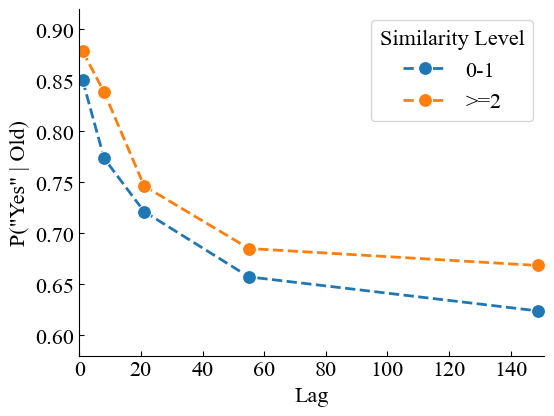

In [44]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='hr', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | Old)')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_hr_{option}.pdf')

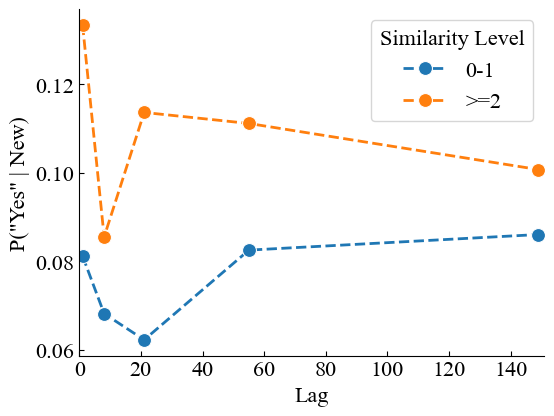

In [46]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='far', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | New)')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_far_{option}.pdf')

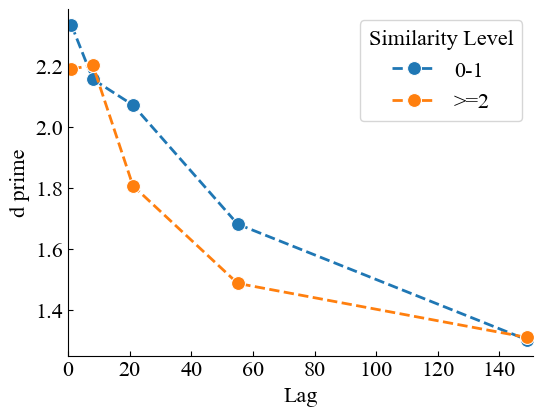

In [47]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='dprime', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('d prime')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_dprime_{option}.pdf')

### Az

In [67]:
def calculate_Az(df_tmp):
    conf = df_tmp.csim
    truth = df_tmp.old
    min_conf = np.round(np.min(conf), 2)
    max_conf = np.round(np.max(conf), 2)

    if np.sum(truth) == 0 or np.sum(~truth) == 0:
        return np.nan
    
    if max_conf - min_conf < 0.1:
        return np.nan

    # calculate HR and FAR for different thresholds
    thresholds = np.arange(min_conf+0.01, max_conf, 0.01)
    hrs = []
    fars = []
    for thresh in thresholds:
        hr = (np.sum((conf > thresh) & truth) + 0.5) / (np.sum(truth) + 1)
        far = (np.sum((conf > thresh) & ~truth) + 0.5) / (np.sum(~truth) + 1)
        hrs.append(hr)
        fars.append(far)

    # calculate z_hr and z_far
    z_hr = norm.ppf(hrs)
    z_far = norm.ppf(fars)

    # linear regression on z_hr and z_far using sklearn
    X = np.array(z_far).reshape(-1, 1)
    y = np.array(z_hr)
    reg = LinearRegression().fit(X, y)
    # get slope and intercept 
    slope = reg.coef_[0]
    intercept = reg.intercept_

    # get A_z
    Az = norm.cdf(intercept/np.sqrt(1+slope**2))
    
    return Az

In [68]:
df_Az = df_simu.groupby(["session", "roll_cat_len_level", "log_lag_bin"]).apply(calculate_Az).to_frame(name="Az").reset_index()
df_Az['log_lag_disp'] = np.ceil(np.e**df_Az.log_lag_bin)
df_Az

/var/folders/js/fb9kwys10ln8jgq1bxxqg0tr0000gn/T/ipykernel_36889/1877012646.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_Az = df_simu.groupby(["session", "roll_cat_len_level", "log_lag_bin"]).apply(calculate_Az).to_frame(name="Az").reset_index()


,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
0,0,0-1,0.0,0.779023,1.0
1,0,0-1,2.0,0.780880,8.0
2,0,0-1,3.0,0.786388,21.0
3,0,0-1,4.0,0.809631,55.0
4,0,0-1,5.0,0.843626,149.0
...,...,...,...,...,...
9671,999,>=2,0.0,0.828630,1.0
9672,999,>=2,2.0,0.836679,8.0
9673,999,>=2,3.0,0.746629,21.0
9674,999,>=2,4.0,0.778974,55.0


In [69]:
# pickup those rows where Az is Nan in df_Az
df_Az.loc[df_Az.Az.isna()]

,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
5,0,0-1,6.0,NaN,404.0
20,1,>=2,5.0,NaN,149.0
25,2,0-1,5.0,NaN,149.0
34,3,0-1,5.0,NaN,149.0
38,3,>=2,4.0,NaN,55.0
...,...,...,...,...,...
9645,996,>=2,4.0,NaN,55.0
9646,996,>=2,5.0,NaN,149.0
9651,997,0-1,5.0,NaN,149.0
9665,998,>=2,5.0,NaN,149.0


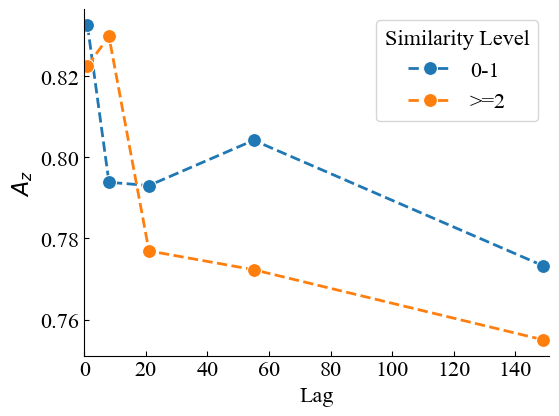

In [71]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_Az, y='Az', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('$A_z$')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_Az_{option}.pdf')